In [1]:
%load_ext dotenv
%dotenv

In [2]:
import os
from dotenv import load_dotenv

load_dotenv() 
ROOT = os.getenv("ROOT")
DATA = os.getenv("DATA")
SCRIPTS = os.getenv("SCRIPTS")

# Make root
os.chdir(SCRIPTS)
print(os.getcwd())

/home/callebalik/clinical_NLP_SE/scripts


In [171]:
from pathlib import Path
import pandas as pd
import numpy 
# file_path = Path(__file__).resolve()
# ROOT = file_path.parent.parent.parent
# DATA_PATH = ROOT / "data"
# AGREEMENT_PATH = DATA_PATH / "raw/coprus/agreement.csv.txt"

AGREEMENT_PATH = "/home/callebalik/clinical_NLP_SE/data/raw/corpus/agreement.csv.txt"
a1_name = "annotator1"
a2_name = "Annotator"

In [172]:
import re as re
df = pd.read_csv(AGREEMENT_PATH)

df = df[["Document", "Position", a1_name, a2_name]]
# df.iloc[:,0].str.extract(r'(\d)(?=.\w+)')

# Add document nr
df['Doc Nr'] = [re.search(r'(\d)(?=.\w+)', x).group() if re.search(r'(\w+)(?=\d.\w+)', x).group() == 'chart' else (int(re.search(r'(\d)(?=.\w+)', x).group())+5)for x in df['Document']]
df = df[["Doc Nr", "Position", a1_name, a2_name]]
# Remove rows with null values - maybe I should compare these - they still add to 
not_null=df.loc[(df.annotator1.notnull()) & (df.Annotator.notnull())]

# df = df.drop(df[df.annotator1 == "NaN"].index)
# df = (df[df["annotator1"].isnull()])

In [183]:
def make_label_list(df, column:str):
    return[x for x in df[column]]

a1 = make_label_list(df, a1_name)
a2 = make_label_list(df, a2_name)

a1_sf = ["SYM/FND" if (x == "SYM" or x == "FND") else x for x in a1]
a2_sf = ["SYM/FND" if (x == "SYM" or x == "FND") else x for x in a2]

a1_d = a1
a2_d = a2

# Do this in dataframe instead

for i, x in enumerate(a1_d):
    if x == "DIS":
        a1_d.pop(i)
        a2_d.pop(i)

for i, x in enumerate(a2_d):
    if x == "DIS":
        a1_d.pop(i)
        a2_d.pop(i)
        
print(a1_d)
        
        

['SYM', 'DIS', 'SYM', nan, 'NEG', 'FND', 'NEG', nan, nan, 'NEG', 'FND', 'NEG', 'NEG', 'NEG', 'SYM', 'SYM', 'SYM', 'NEG', 'NEG', 'SYM', 'SYM', 'NEG', 'FND', 'NEG', 'FND', nan, nan, 'FND', 'NEG', 'FND', 'NEG', 'FND', 'NEG', 'FND', 'FND', 'NEG', 'NEG', 'FND', nan, 'FND', 'NEG', 'FND', 'SYM', 'NEG', 'NEG', 'SYM', 'NEG', 'FND', 'FND', 'NEG', 'SYM', 'FND', 'FND', 'NEG', 'FND', 'FND', 'FND', nan, 'FND', 'FND', 'NEG', 'FND', 'FND', 'FND', 'NEG', 'FND', 'FND', 'FND', 'NEG', 'FND', 'FND', 'NEG', 'DIS', 'NEG', 'FND', 'FND', 'FND', 'FND', 'FND', 'NEG', 'SYM', 'DIS', 'SYM', 'NEG', 'FND', 'FND', 'NEG', 'SYM', 'FND', 'NEG', 'SYM', 'FND', 'SYM', 'NEG', 'FND', 'NEG', 'FND', 'FND', 'NEG', 'FND', 'NEG', 'SYM', 'SYM', 'NEG', nan, 'NEG', 'FND', 'FND', 'NEG', 'FND', 'FND', 'FND', nan, 'NEG', 'FND', 'NEG', 'FND', 'FND', 'FND', 'FND', 'NEG', 'NEG', 'SYM', 'NEG', 'FND', 'FND', 'NEG', 'FND', 'NEG', 'FND', 'NEG', 'FND', 'NEG', 'FND', nan, 'FND', 'FND', 'NEG', 'DIS', nan, 'NEG', 'FND', 'FND', 'SYM', nan, 'NEG', '

In [194]:
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt  
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report


print(f"Cohen Kappa {cohen_kappa_score(a1, a2)}")
print(f"Cohen Kappa SYM/FND {cohen_kappa_score(a1_sf, a2_sf)}")
print(f"Cohen Kappa Drop Disease from Eval {cohen_kappa_score(a1_sf, a2_sf)}")
cr = classification_report(a1, a2, target_names=None, output_dict=True, zero_division=0)
cr_sf = classification_report(a1_sf, a2_sf, target_names=None, output_dict=True)

Cohen Kappa 0.5467389448523134
Cohen Kappa SYM/FND 0.5654019633855134
Cohen Kappa Drop Disease from Eval 0.5654019633855134


In [196]:
df_cr = pd.DataFrame.from_dict(cr)
df_cd_sf = pd.DataFrame.from_dict(cr_sf)

# print(df_cr)
# print(df_cd_sf)

df_compare_sym_fnd = df_cr[["DIS", "FND", "NEG", "SYM", "nan"]]
df_compare_sym_fnd = df_cr[["FND", "NEG", "SYM"]]

print(df_compare_sym_fnd)
df_cd_sf

                  FND        NEG        SYM
precision    0.716981   0.945946   0.584906
recall       0.672566   0.945946   0.756098
f1-score     0.694064   0.945946   0.659574
support    113.000000  74.000000  41.000000


,DIS,NEG,SYM/FND,nan,accuracy,macro avg,weighted avg
precision,1.000000,0.945946,0.741379,0.0,0.734694,0.671831,0.772695
recall,0.395349,0.945946,0.837662,0.0,0.734694,0.544739,0.734694
f1-score,0.566667,0.945946,0.786585,0.0,0.734694,0.574799,0.732996
support,43.000000,74.000000,154.000000,23.0,0.734694,294.000000,294.000000


In [198]:
print(confusion_matrix(a1, a2, normalize="all"))

[[0.         0.01544402 0.         0.01544402 0.        ]
 [0.         0.29343629 0.01158301 0.05405405 0.07722008]
 [0.         0.         0.27027027 0.         0.01544402]
 [0.         0.03088803 0.         0.11969112 0.00772201]
 [0.         0.06949807 0.003861   0.01544402 0.        ]]


<AxesSubplot:>

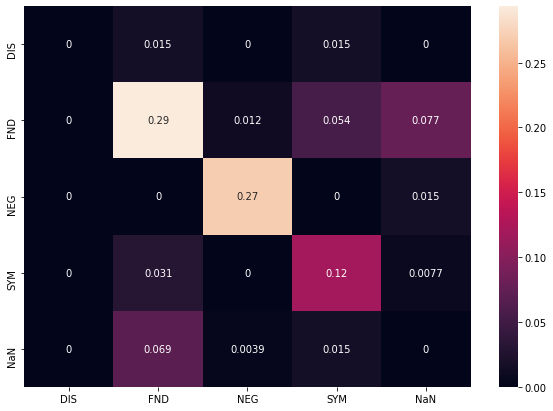

In [199]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
# array = [[33,2,0,0,0,0,0,0,0,1,3], 
#         [3,31,0,0,0,0,0,0,0,0,0], 
#         [0,4,41,0,0,0,0,0,0,0,1], 
#         [0,1,0,30,0,6,0,0,0,0,1], 
#         [0,0,0,0,38,10,0,0,0,0,0], 
#         [0,0,0,3,1,39,0,0,0,0,4], 
#         [0,2,2,0,4,1,31,0,0,0,2],
#         [0,1,0,0,0,0,0,36,0,2,0], 
#         [0,0,0,0,0,0,1,5,37,5,1], 
#         [3,0,0,0,0,0,0,0,0,39,0], 
#         [0,0,0,0,0,0,0,0,0,0,38]]

labels = ["DIS", "FND", "NEG", "SYM", "NaN"]
array = confusion_matrix(a1, a2, normalize="all")
df_cm = pd.DataFrame(array, index = labels,
                  columns = labels)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)